In [1]:
# Sep 28 2019
# Miami

# Original:testing_csv_chunk_read-Copy1.ipynb

# When working on the determinants of patent citation, I found a weird concentration of 14 citations in patents from 2003
# Most likely there is some issue with the 'join' statement
# This code is helping me debbuggin the issue
# The idea is to isolate the patents who had this number of citations
# To do that, I face an issue of memory size, the file is too large and memory runs out
# I use the iterator option from pandas.read_csv, what gives me an iterator in the place of the dataframe


# update: as I read the files, I find many whitespaces
# usually i would clean with .str.strip(), but I am using an iterator.

# Ha um problema no arquivo de citacoes. Estou reescrevendo o codigo que junta as citacoes a tabela base de patentes
# Estou tambem acrescentando backward citation - a intencao eh usar da mesma forma que claims e tambem para salientar o significado das forward citations
# Porem carregar o arquivo inteiro na memoria nao esta funcionado

# Quando o Marcelo escreveu o codig lxml, tudo foi feito com iterators
# Nao estou conseguindo testar por algum problema no servidor

# Assim, o que vou fazer agora eh selecionar um chunk para trabalhar localmente


In [2]:
import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt
# import json

# import csv

In [3]:
# class ItemLoader(ItemLoader):

#     default_output_processor = MapCompose(unicode.strip)

In [16]:
%matplotlib inline

In [4]:
fname = '/home/rkogeyam/PATENT_CITATION/uspatentcitation.tsv'
dst = '/home/rkogeyam/PATENT_CITATION/fwd_back_cit.csv'

In [5]:
# # To run a sample

# n = sum(1 for line in open(fname)) - 1 #number of records in file (excludes header)
# s = 10000 #desired sample size
# skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
# df = pd.read_csv(fname, skiprows=skip, sep='\t', lineterminator='\n', na_values='-')

In [6]:
# To run complete
df = pd.read_csv(fname, sep='\t', lineterminator='\n', na_values='-')

In [7]:
df.describe()

,sequence
count,9.145330e+07
mean,6.672389e+01
std,1.764092e+02
min,0.000000e+00
25%,4.000000e+00
50%,1.200000e+01
75%,5.000000e+01
max,5.840000e+03


In [8]:
df.head()

,uuid,patent_id,citation_id,date,name,kind,country,category,sequence
0,000007b7c0x3n9iy1othb9hz7,9009250,8127342,2012-02-01,Boynton et al.,B2,US,cited by applicant,622
1,000007obbnxmqc6v43t1c00dw,9643605,5471515,1995-11-01,Fossum et al.,A,US,cited by applicant,413
2,00000jd7thmiucpaol1hm1835,5354551,4875247,1989-10-01,Berg,NaN,US,NaN,11
3,00000oohcwply47niwhm5i42l,D786922,D718330,2014-11-01,Shin,S,US,cited by examiner,11
4,00002ghv7v87txbmryocp9i60,D490798,D190749,1961-06-01,Matri et al.,S,US,cited by examiner,1


In [9]:
forward_citation=Counter(df['patent_id'])
forward_citation

Counter({'7773542': 3,
         '7277855': 3,
         '7402149': 4,
         'D529710': 12,
         '7965477': 27,
         '4359642': 4,
         '5708434': 6,
         '8297031': 11,
         '8253550': 1,
         '5892829': 2,
         '6919892': 7,
         'D563414': 22,
         '6421566': 7,
         '7236959': 16,
         'D665710': 5,
         'D507731': 11,
         '9167012': 2,
         '5954060': 10,
         '9158918': 3,
         '5139214': 7,
         '4361210': 9,
         '7499959': 39,
         '6262881': 15,
         '4813748': 2,
         'D379087': 6,
         '9214005': 7,
         '7831064': 12,
         '4104149': 7,
         '4787757': 4,
         '6370085': 5,
         '4048741': 8,
         '6555991': 10,
         '5563552': 15,
         '6980524': 18,
         '9816887': 6,
         '9696777': 1,
         '8012368': 27,
         'D508453': 5,
         '8068844': 3,
         '6312333': 12,
         '8700529': 386,
         '9540191': 5,
         '6953361

In [10]:
backward_citation=Counter(df['citation_id'])
backward_citation

Counter({nan: 23,
         '7277855': 66,
         '7402149': 3,
         'D529710': 5,
         '7965477': 1,
         '4359642': 16,
         '5708434': 8,
         '5602692             ': 1,
         '5892829': 30,
         '4419161             ': 1,
         '6919892': 334,
         '1861860': 1,
         '6421566': 124,
         '4838543': 80,
         'D507731': 18,
         '2719768': 6,
         '2982586': 25,
         '4939703': 7,
         '3154011': 4,
         '4111297': 30,
         '5459742             ': 1,
         '8063451': 6,
         '3109323': 2,
         '5477396': 17,
         '4813748': 3,
         'D379087': 1,
         '3302345': 7,
         '7831064': 8,
         '4821926             ': 1,
         '4104149': 11,
         '5526279': 8,
         '4787757': 17,
         '6370085': 7,
         '2047216             ': 1,
         '6590494': 3,
         '4048741': 16,
         '5563552': 10,
         '6980524': 54,
         '340801': 3,
         '8012368': 5,
    

In [11]:
df=pd.DataFrame({'backward_citation':pd.Series(backward_citation),'forward_citation':pd.Series(forward_citation)})

In [12]:
df=df.fillna(0)

In [13]:
df.describe()

,backward_citation,forward_citation
count,9.565515e+06,9.565515e+06
mean,9.560729e+00,9.560729e+00
std,2.638685e+01,3.447569e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00
50%,3.000000e+00,3.000000e+00
75%,9.000000e+00,9.000000e+00
max,3.744000e+03,5.811000e+03


In [14]:
df.head()

,backward_citation,forward_citation
NaN,23.0,0.0
7277855,66.0,3.0
D529710,5.0,12.0
D364634,4.0,0.0
7965477,1.0,27.0


In [15]:
# df.to_csv(dst)

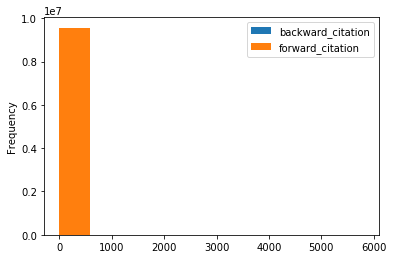

In [17]:
plt.figure()
df.plot.hist(column='backward_citation')

In [ ]:
df.plot.hist(column='forward_citation')

In [ ]:
df.boxplot()